In [2]:
import pandas as pd
import warnings
import numpy as np
# 경고문고 씹도록
warnings.simplefilter(action='ignore', category = FutureWarning)
warnings.simplefilter(action='ignore', category = UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df1 = pd.read_csv('0907_머신러닝_WIL_작물_최대_최소기온_추가.csv')
df1

,temperature,rainfall,temp_min,temp_max,label
0,20.879744,202.935536,18,28,쌀
1,21.770462,226.655537,18,28,쌀
2,23.004459,263.964248,18,28,쌀
3,26.491096,242.864034,18,28,쌀
4,20.130175,262.717340,18,28,쌀
...,...,...,...,...,...
3997,22.325848,95.987729,4,33,양파
3998,23.280173,99.097321,4,33,양파
3999,22.472814,56.854032,4,33,양파
4000,21.441799,46.365845,4,33,양파


In [5]:
df1.describe()

,temperature,rainfall,temp_min,temp_max
count,4002.000000,4002.000000,4002.000000,4002.000000
mean,21.238994,91.413328,8.229135,29.099700
std,6.040290,52.357221,12.416569,4.918359
min,8.825675,0.100000,-25.000000,16.000000
25%,16.519200,61.366776,5.000000,25.000000
50%,21.142111,84.878018,10.000000,29.000000
75%,25.549124,105.646244,18.000000,35.000000
max,43.675493,819.400000,27.000000,38.000000


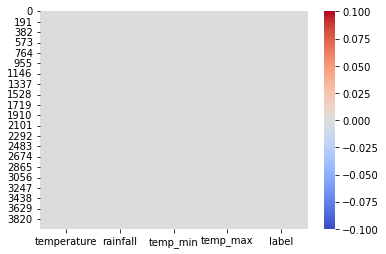

In [6]:
sns.heatmap(df1.isnull(), cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='temp_min', ylabel='Density'>

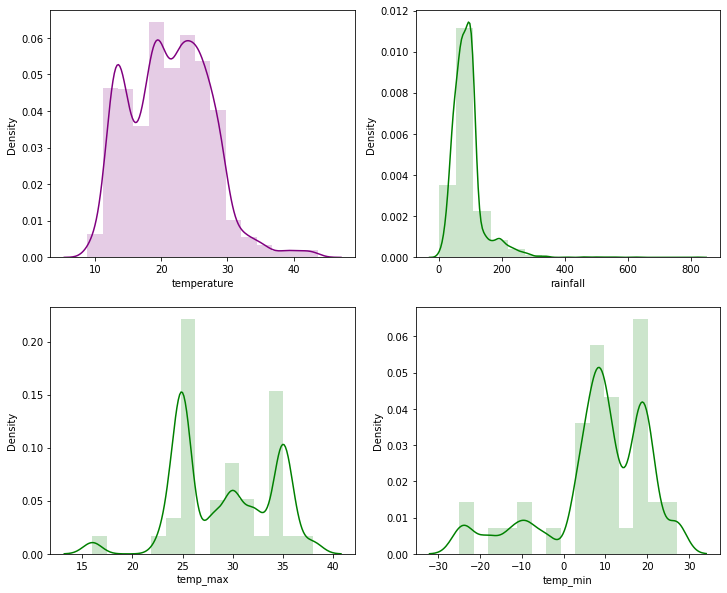

In [11]:
# 전체 값들의 분포 확인
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.distplot(df1['temperature'], color='purple', bins=15, hist_kws={'alpha':0.2})
plt.subplot(2, 2, 2)
sns.distplot(df1['rainfall'], color='green', bins=15, hist_kws={'alpha':0.2})
plt.subplot(2, 2, 3)
sns.distplot(df1['temp_max'], color='green', bins=15, hist_kws={'alpha':0.2})
plt.subplot(2, 2, 4)
sns.distplot(df1['temp_min'], color='green', bins=15, hist_kws={'alpha':0.2})

<AxesSubplot:xlabel='count', ylabel='label'>

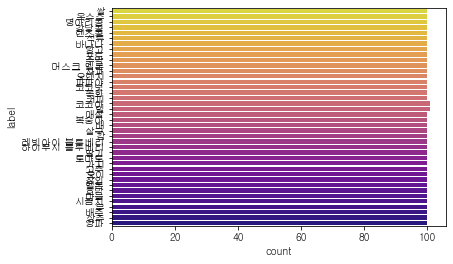

In [13]:
#쥬피터 한글
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)

sns.countplot(y='label', data=df1, palette='plasma_r')

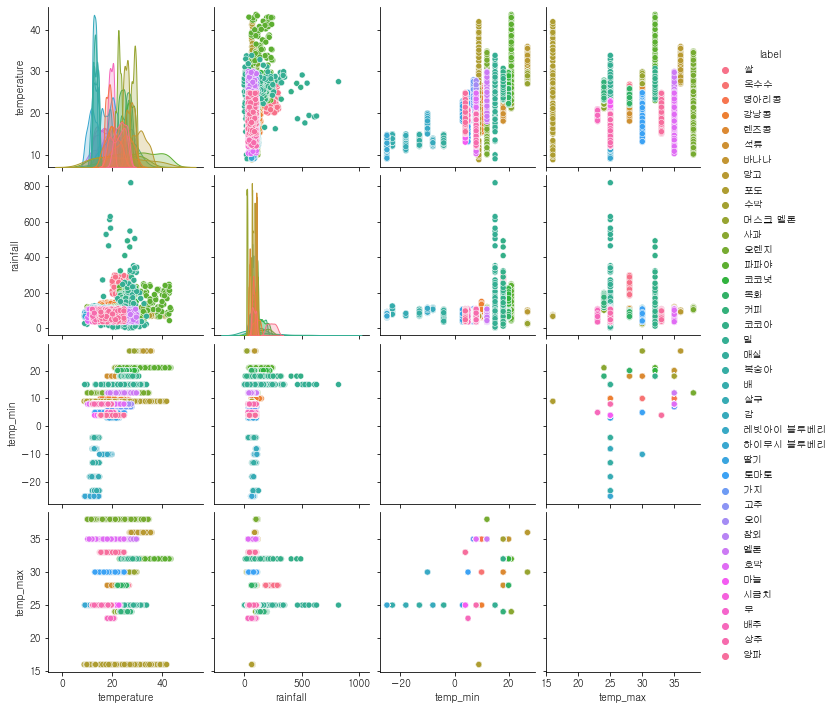

In [14]:
# pairplot
sns.pairplot(df1, hue='label')
# tempmax, temperature 인사이트

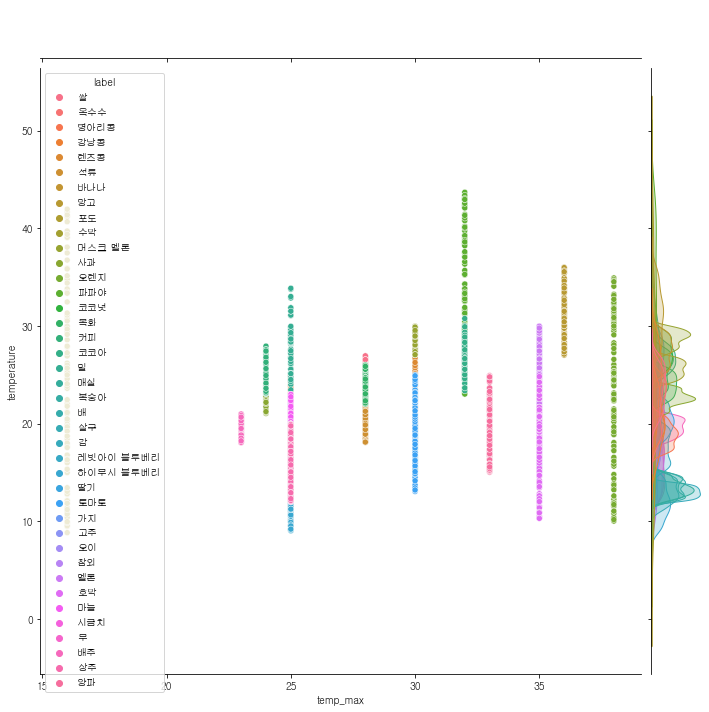

In [19]:
from turtle import width


sns.jointplot(x='temp_max', y='temperature', data = df1, hue='label', height=10, ratio=10)

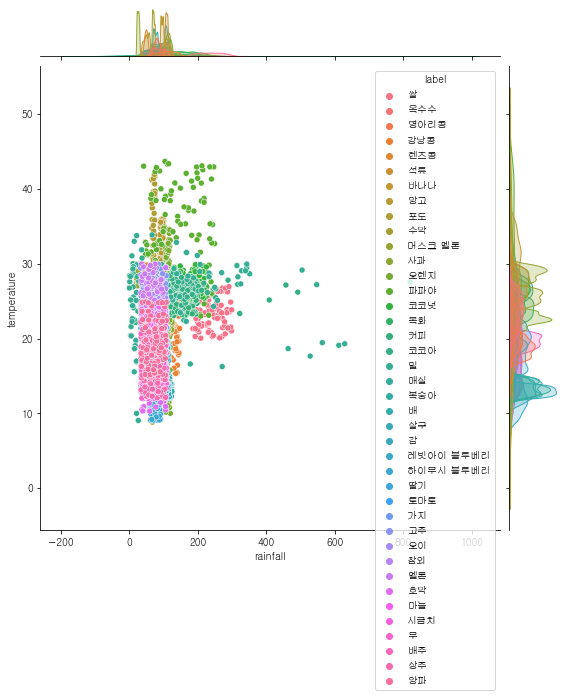

In [22]:
sns.jointplot(x='rainfall', y='temperature', data=df1, hue='label', height=8, ratio=8)

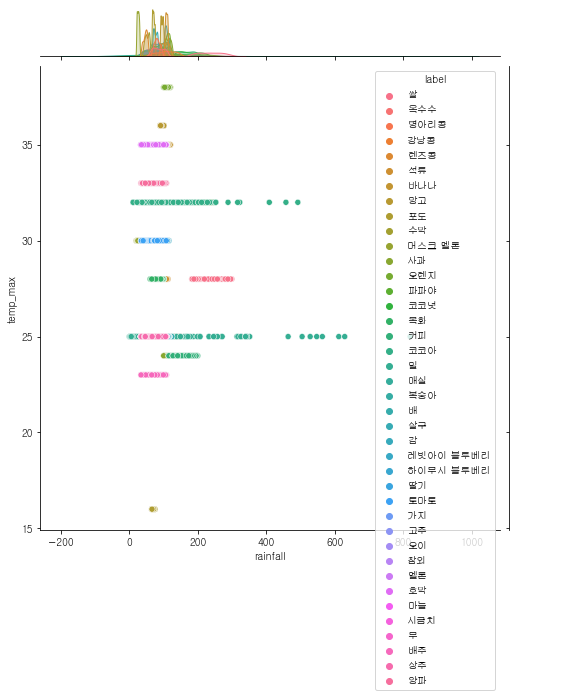

In [23]:
sns.jointplot(x='rainfall', y='temp_max', data=df1, hue='label', height=8, ratio=8)

<AxesSubplot:xlabel='temperature', ylabel='label'>

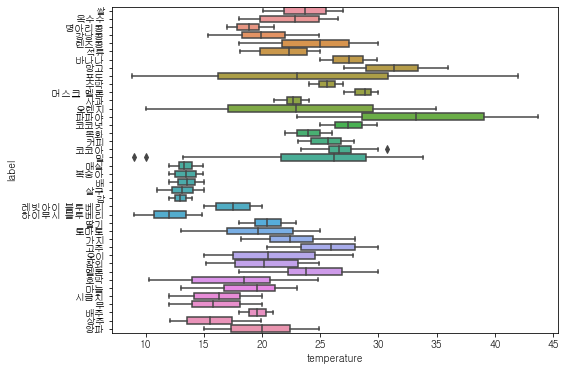

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='label', x='temperature', data=df1)

<AxesSubplot:xlabel='rainfall', ylabel='label'>

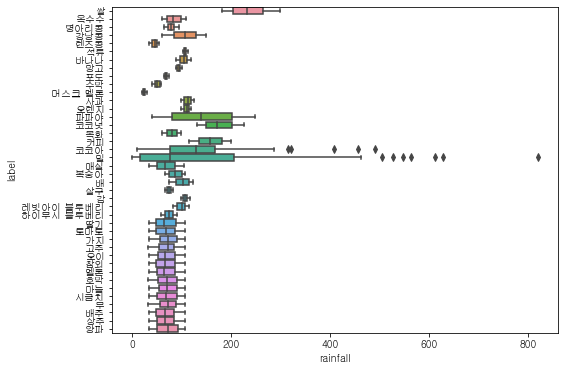

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='label', x='rainfall', data=df1)

<AxesSubplot:xlabel='temperature', ylabel='label'>

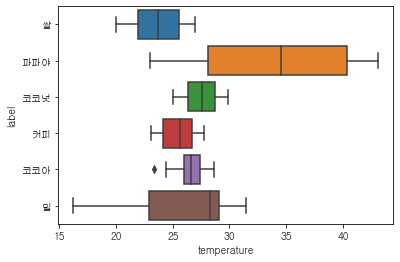

In [35]:
sns.boxplot(y='label', x='temperature', data=df1[df1['rainfall']>150])

<AxesSubplot:xlabel='temperature', ylabel='rainfall'>

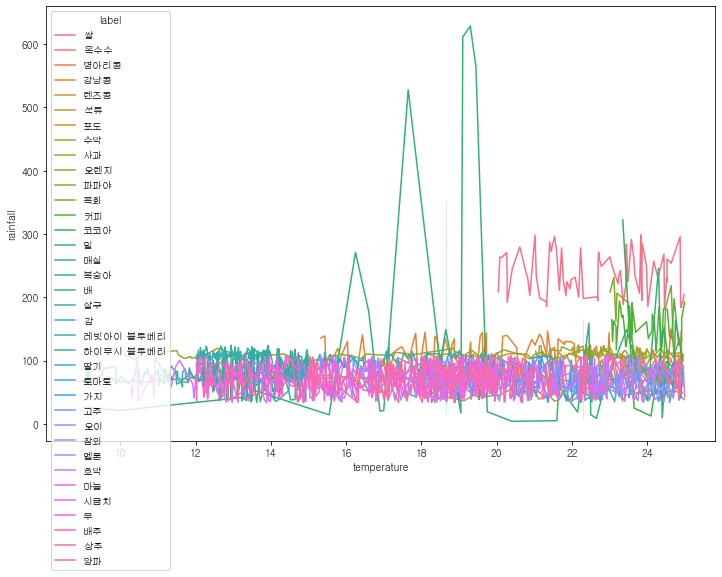

In [39]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = df1[(df1['temperature'])<25], x = 'temperature', y='rainfall', hue='label')

In [4]:
c = df1.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df1['target'] = c.cat.codes

y = df1.target
X = df1[['temperature', 'temp_max', 'temp_min', 'rainfall']]
X 

,temperature,temp_max,temp_min,rainfall
0,20.879744,28,18,202.935536
1,21.770462,28,18,226.655537
2,23.004459,28,18,263.964248
3,26.491096,28,18,242.864034
4,20.130175,28,18,262.717340
...,...,...,...,...
3997,22.325848,33,4,95.987729
3998,23.280173,33,4,99.097321
3999,22.472814,33,4,56.854032
4000,21.441799,33,4,46.365845


<AxesSubplot:>

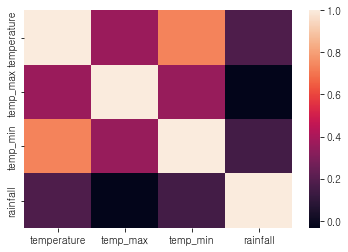

In [43]:
# 최저기온과 기온은 상관관계, 최대기온은 아님
sns.heatmap(X.corr())

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2022
)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8731268731268731

<AxesSubplot:>

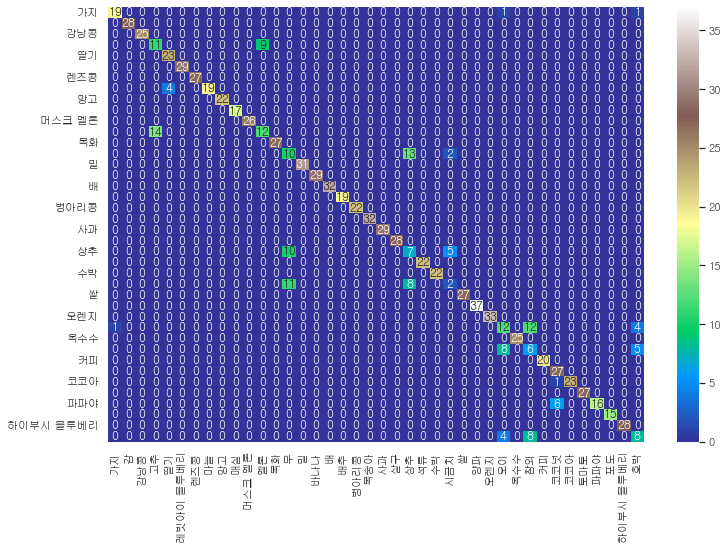

In [55]:
from sklearn.metrics import confusion_matrix
rc('font', family=font)
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
# font 설정
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
sns.set(font=font)
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

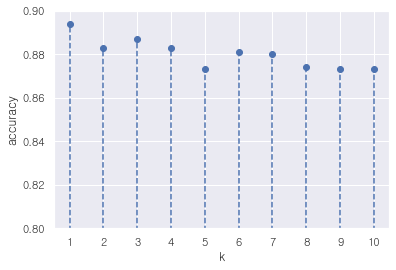

In [65]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0,scores, linestyle="dashed")
plt.ylim(0.8,0.9)
plt.xticks([i for i in range(1,11)]);

In [66]:
from sklearn.svm import SVC
svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.5254745254745254
Rbf Kernel Accuracy:  0.8271728271728271
Poly Kernel Accuracy:  0.8911088911088911


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
model = GridSearchCV(estimator= SVC(kernel='linear'), param_grid =parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [68]:
print(model.best_score_)
print(model.best_estimator_)

0.8783715046604527
SVC(C=0.1, gamma=0.001, kernel='linear')


In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9050949050949051

[Text(0.5339625341420309, 0.9827586206896551, 'X[1] <= 19.5\ngini = 0.975\nsamples = 3001\nvalue = [79, 72, 75, 80, 77, 71, 73, 77, 78, 83, 74, 74\n73, 75, 70, 71, 68, 81, 78, 68, 71, 72, 78, 78\n78, 79, 73, 63, 67, 71, 75, 81, 80, 73, 77, 73\n78, 85, 72, 80]'),
 Text(0.5288211459672236, 0.9482758620689655, 'gini = 0.0\nsamples = 85\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 85, 0, 0]'),
 Text(0.539103922316838, 0.9482758620689655, 'X[1] <= 23.5\ngini = 0.974\nsamples = 2916\nvalue = [79, 72, 75, 80, 77, 71, 73, 77, 78, 83, 74, 74\n73, 75, 70, 71, 68, 81, 78, 68, 71, 72, 78, 78\n78, 79, 73, 63, 67, 71, 75, 81, 80, 73, 77, 73\n78, 0, 72, 80]'),
 Text(0.5339625341420309, 0.9137931034482759, 'gini = 0.0\nsamples = 81\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.5442453104916453, 0.9137931034482759, 'X[2] <= 24.0\ngin

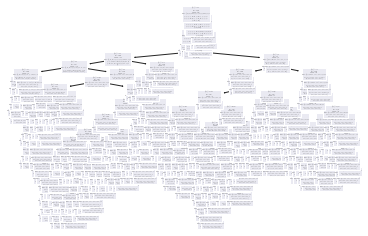

In [70]:
plot_tree(clf)

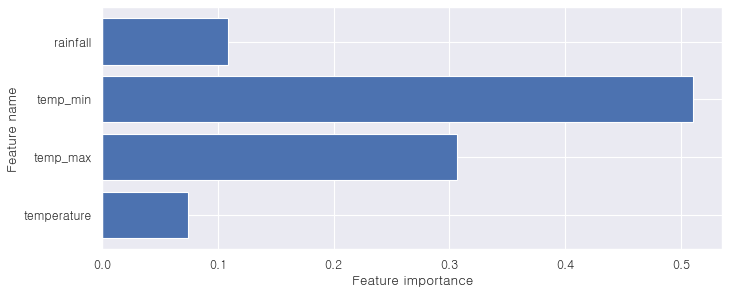

In [71]:
# dpi는 해상도
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.86
RF Accuracy on test set: 0.86


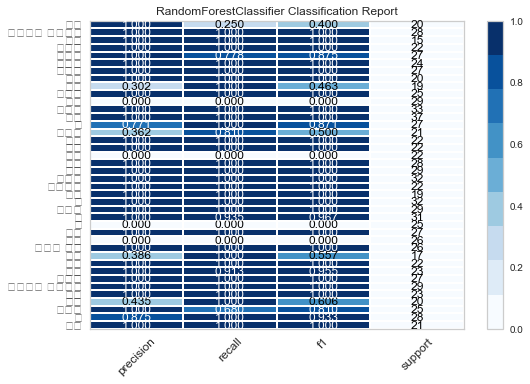

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [74]:
# RFC
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues", font=font)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

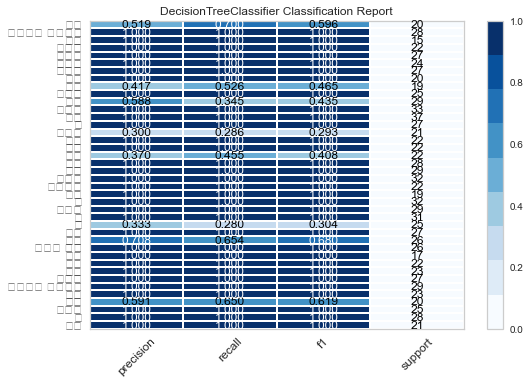

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [76]:
# DTC
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [13]:
import torch
import pandas as pd 
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [16]:
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print(torch.cuda.get_device_name())
BATCH_SIZE = 32
EPOCHS = 30 

NVIDIA GeForce GTX 1650


In [8]:
X

,temperature,temp_max,temp_min,rainfall
0,20.879744,28,18,202.935536
1,21.770462,28,18,226.655537
2,23.004459,28,18,263.964248
3,26.491096,28,18,242.864034
4,20.130175,28,18,262.717340
...,...,...,...,...
3997,22.325848,33,4,95.987729
3998,23.280173,33,4,99.097321
3999,22.472814,33,4,56.854032
4000,21.441799,33,4,46.365845


In [11]:
len(y.unique())

40

In [73]:
from torch.utils.data import Dataset
class MyBaseDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        
    def __getitem__(self, index): 
        return self.x_data[index], self.y_data[index]
        
    def __len__(self): 
        return self.x_data.shape[0]

In [74]:
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)


In [75]:
BATCH_SIZE = 32
EPOCHS = 30 
train_dataset = MyBaseDataset(X_train_scaled, y_train)
test_dataset = MyBaseDataset(X_test_scaled, y_test)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          shuffle=False,
                                          batch_size=BATCH_SIZE)

In [76]:
for (X_train, y_train) in train_loader:
    print(X_train.size(), y_train.size())
    print(X_train.type(), y_train.type())
    break

torch.Size([32, 4]) torch.Size([32])
torch.FloatTensor torch.LongTensor


In [77]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 40)
    
    def forward(self, x):
        x = x.view(-1, 4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x


In [97]:
del model

In [98]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.5)
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=4, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=40, bias=True)
)


In [99]:
def train(model, train_loader, optimizer, log_interval=100):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        output = model(image)
        optimizer.zero_grad()
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f'Train_Epoch: {Epoch}, [{batch_idx*len(image)} / {len(train_loader.dataset)}({(100. *batch_idx / len(train_loader)):.0f}%]\tTrain_Loss ; {(loss.item()):.6f}')




In [100]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    test_loss = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss /= len(test_loader)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [101]:
best_accuracy = 0
stop_num = 0
EPOCHS = 3000
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model
        stop_num = 0
    print(f'\n[EPOCH: {Epoch}, \tTest_loss : {(test_loss):.4f}, \tTest_accuracy : {(test_accuracy):.2f}%\n')
    if stop_num >= 100 :
        break
    stop_num += 1

Train_Epoch: 1, [0 / 3001(0%]	Train_Loss ; 3.686204

[EPOCH: 1, 	Test_loss : 3.6678, 	Test_accuracy : 2.20%

Train_Epoch: 2, [0 / 3001(0%]	Train_Loss ; 3.640285

[EPOCH: 2, 	Test_loss : 3.6406, 	Test_accuracy : 3.30%

Train_Epoch: 3, [0 / 3001(0%]	Train_Loss ; 3.624701

[EPOCH: 3, 	Test_loss : 3.6033, 	Test_accuracy : 4.00%

Train_Epoch: 4, [0 / 3001(0%]	Train_Loss ; 3.548754

[EPOCH: 4, 	Test_loss : 3.5507, 	Test_accuracy : 6.79%

Train_Epoch: 5, [0 / 3001(0%]	Train_Loss ; 3.519422

[EPOCH: 5, 	Test_loss : 3.4763, 	Test_accuracy : 6.79%

Train_Epoch: 6, [0 / 3001(0%]	Train_Loss ; 3.467661

[EPOCH: 6, 	Test_loss : 3.3770, 	Test_accuracy : 7.09%

Train_Epoch: 7, [0 / 3001(0%]	Train_Loss ; 3.400608

[EPOCH: 7, 	Test_loss : 3.2478, 	Test_accuracy : 10.39%

Train_Epoch: 8, [0 / 3001(0%]	Train_Loss ; 3.201541

[EPOCH: 8, 	Test_loss : 3.0928, 	Test_accuracy : 8.29%

Train_Epoch: 9, [0 / 3001(0%]	Train_Loss ; 3.151031

[EPOCH: 9, 	Test_loss : 2.9294, 	Test_accuracy : 15.78%

Train_Epoch: 10, 

In [102]:
print(best_accuracy)

90.20979020979021
